In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


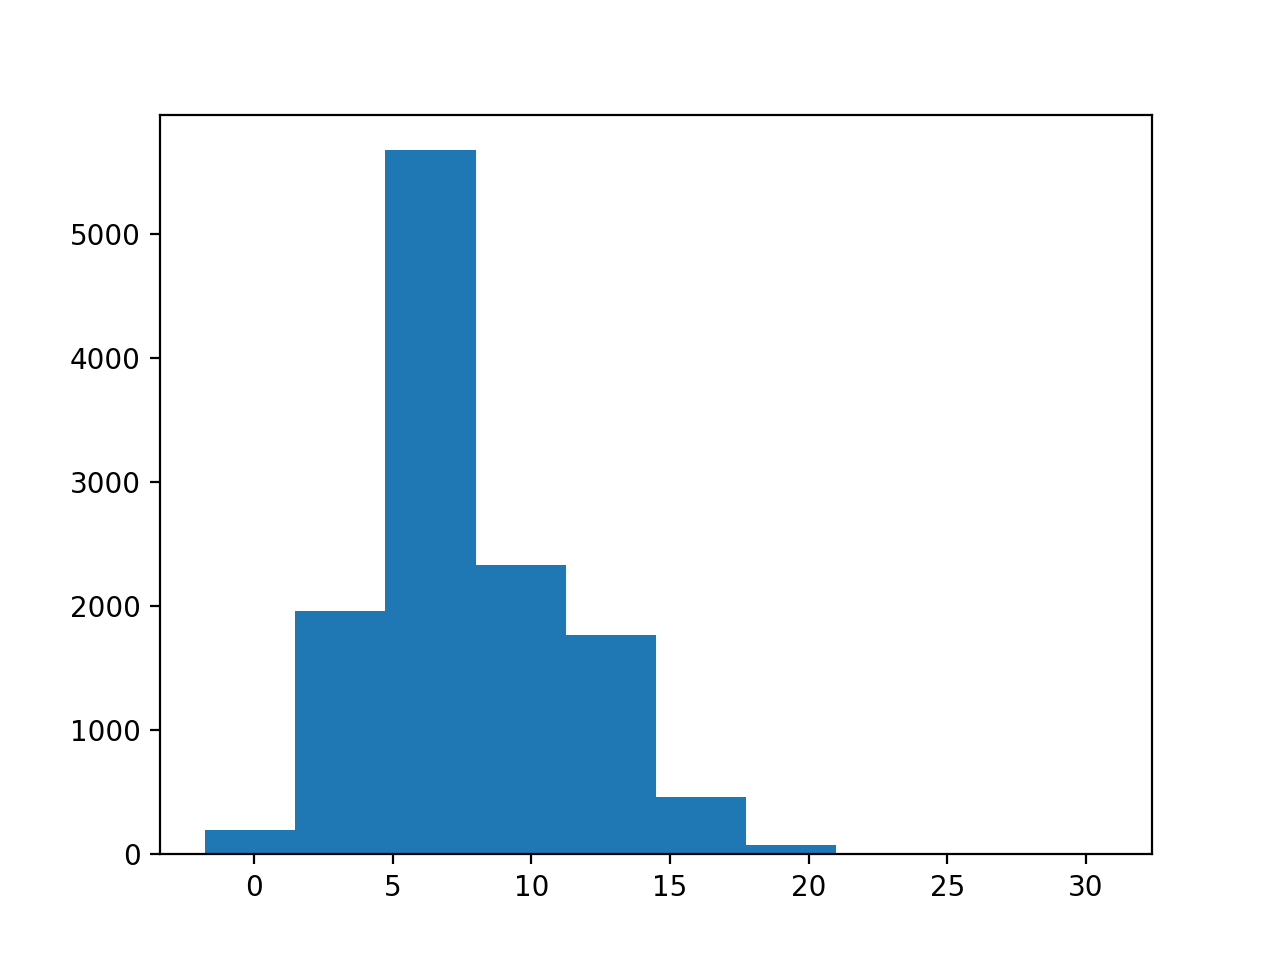

In [4]:
data = np.loadtxt("dataset.txt")
plt.hist(data);

# Measures of Centrality

### Mean

If we have a set of points N points denoted $x_i$, the mean is defined as

$$ \frac{1}{N} \sum_{i=1}^N x_i $$

A way to manually compute the mean is given by:


In [5]:
def get_mean(xs):
    summed = 0
    for x in xs:
        summed += x
    return summed / len(xs)

print(get_mean([3,5,2,6]))

4.0


In [6]:
mean = np.mean(data)
print(mean, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


# Median

Sort all your data and take out the middle element. Thats your median. `[1,3,5,7,7]` has a median of `5`. Here's how we can manually find the median:

In [13]:
def get_median(xs):
    mid = len(xs) // 2
    if len(xs) % 2 == 1: # odds
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid - 1: mid + 1])
    

print(get_median([7,7,3,1,4,5]))  

4.5


In [14]:
median = np.median(data)
print(median)

6.7325


## Outliers

<IPython.core.display.Javascript object>


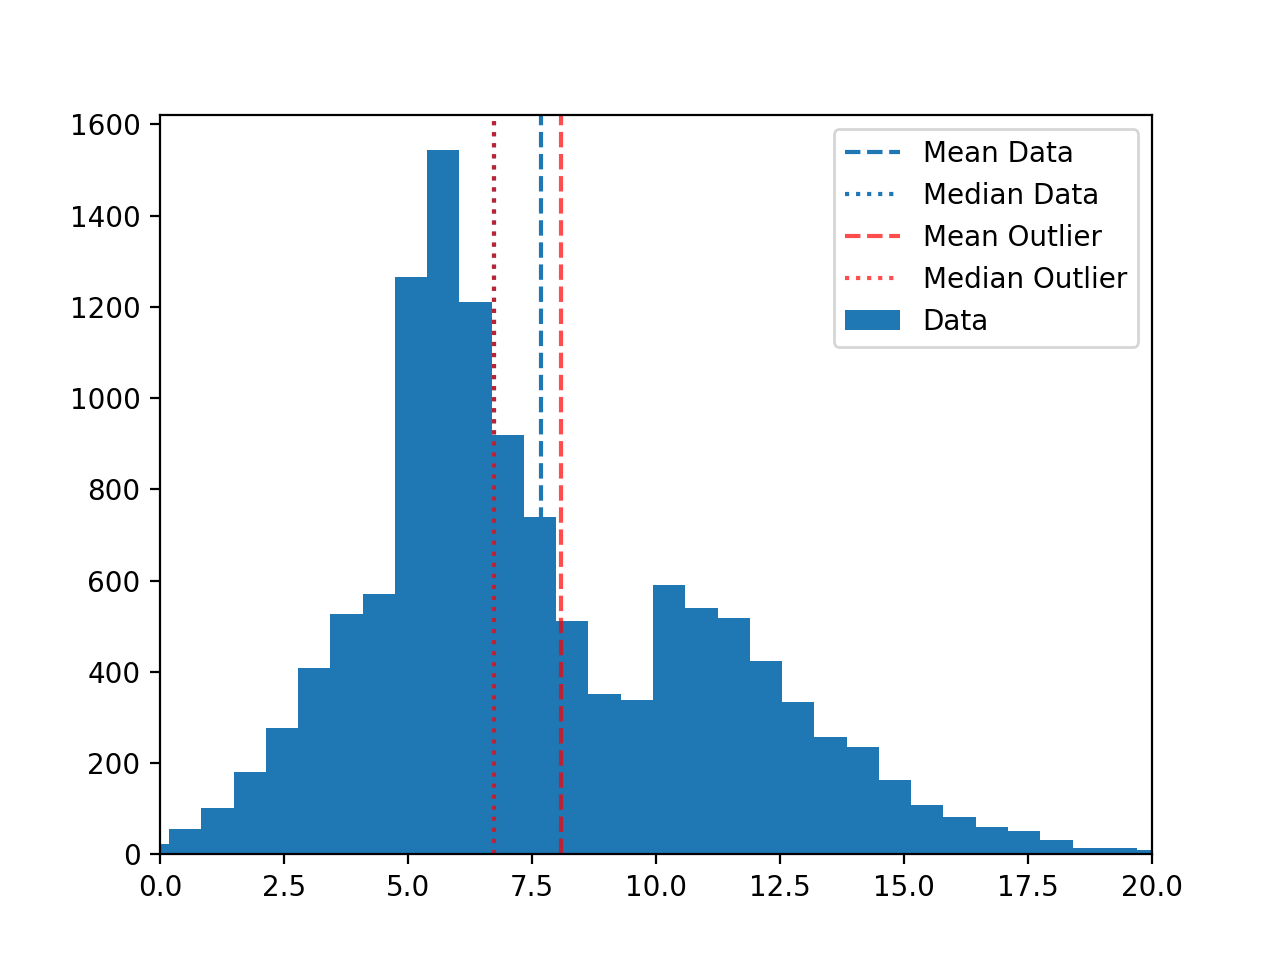

In [18]:
outlier = np.insert(data, 0, 5000)
plt.hist(data, label="Data", bins=50);
plt.axvline(np.mean(data), ls="--", label="Mean Data")
plt.axvline(np.median(data), ls=":", label="Median Data")
plt.axvline(np.mean(outlier), c='r', ls="--", label="Mean Outlier", alpha=0.7)
plt.axvline(np.median(outlier), c='r', ls=":", label="Median Outlier", alpha=0.7)
plt.legend()
plt.xlim(0,20);

## Mode

### most common value in the dataset

In [20]:
def get_mode(xs):
    values, counts = np.unique(xs, return_counts=True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]

print(get_mode([1,7,2,5,3,3,8,3,2]))

3


In [21]:
mode = st.mode(data)

In [22]:
mode

ModeResult(mode=array([5.519]), count=array([9]))

In [25]:
hist, edges = np.histogram(data, bins = 100)
edge_centers = 0.5 * (edges[1:] + edges[:-1])
mode = edge_centers[hist.argmax()]
print(mode)

5.223165


<IPython.core.display.Javascript object>


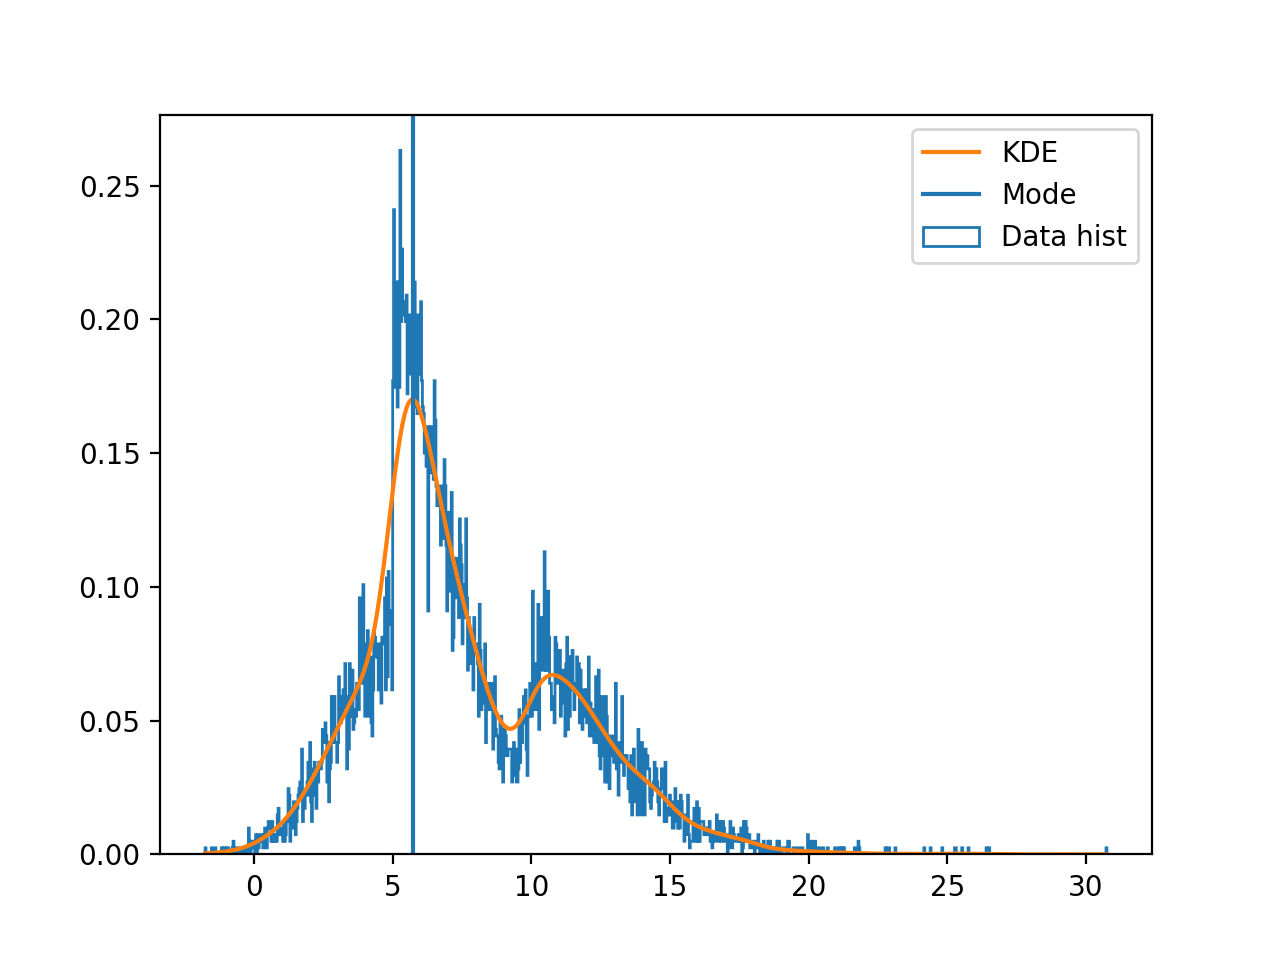

In [26]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000) #1000 samples
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.hist(data, bins=1000, density=True, label="Data hist", histtype="step")
plt.plot(xvals, yvals, label="KDE")
plt.axvline(mode, label="Mode")
plt.legend();

# Comparison

<IPython.core.display.Javascript object>


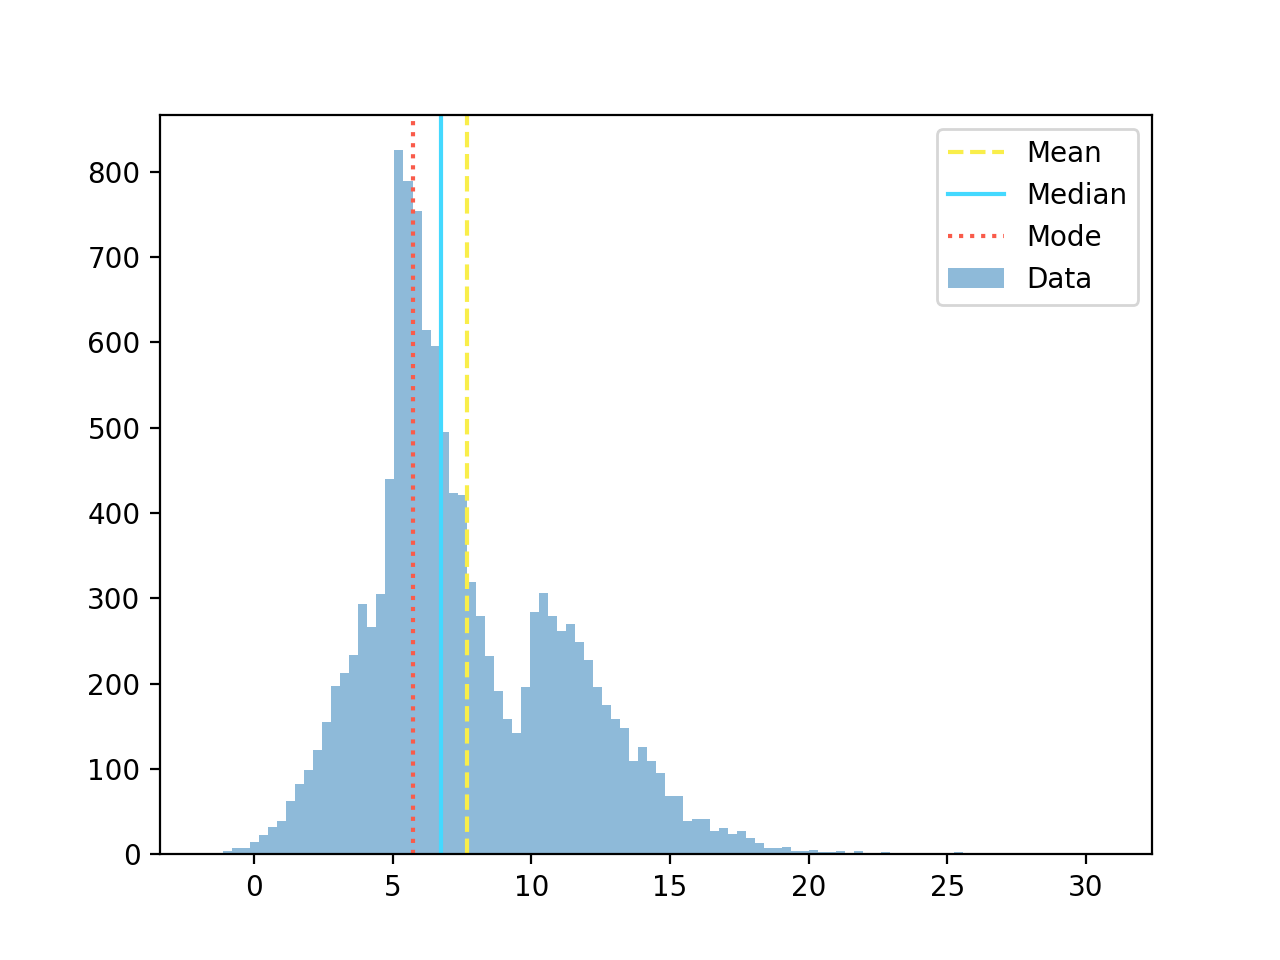

In [27]:
plt.hist(data, bins=100, label="Data", alpha=0.5)
plt.axvline(mean, label="Mean", ls="--", c='#f9ee4a')
plt.axvline(median, label="Median", ls="-", c='#44d9ff')
plt.axvline(mode, label="Mode", ls=":", c='#f95b4a')
plt.legend();

# Measures of width and balance

* Variance
* Standard deviation
* Skewness
* Kurtosis

### Variance

The variance of a distrbution is a measure of how much it spreads out around the mean. A touch more formally, its the expected value of the squared deviation from the mean. Even more formally, it is given by 

$$ Var = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2, $$

where $\mu$ is the mean of the dataset $x$, as described in the previous section. Note there is a fine point about whether you should divide by $N$ or $N-1$. Here is a manual way of calculating it:

In [29]:
def get_variance(xs):
    mean = np.mean(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**2
    return summed / (len(xs) - 1)

print(get_variance([1,2,3,4,5]))

2.5


In [31]:
variance = np.var([1,2,3,4,5], ddof=1) #ddof = Delta Degrees of Freedom
variance

2.5

In [32]:
variance = np.var(data, ddof=1) #ddof = Delta Degrees of Freedom
variance

13.137626632694301

# Standard Deviation

Square root of the variance.

In [33]:
std = np.std(data)
print(std, std**2)

3.6244414221454435 13.136575622563685


# Our powers combined

Gaussian aproximation, also known as normal approximation

<IPython.core.display.Javascript object>


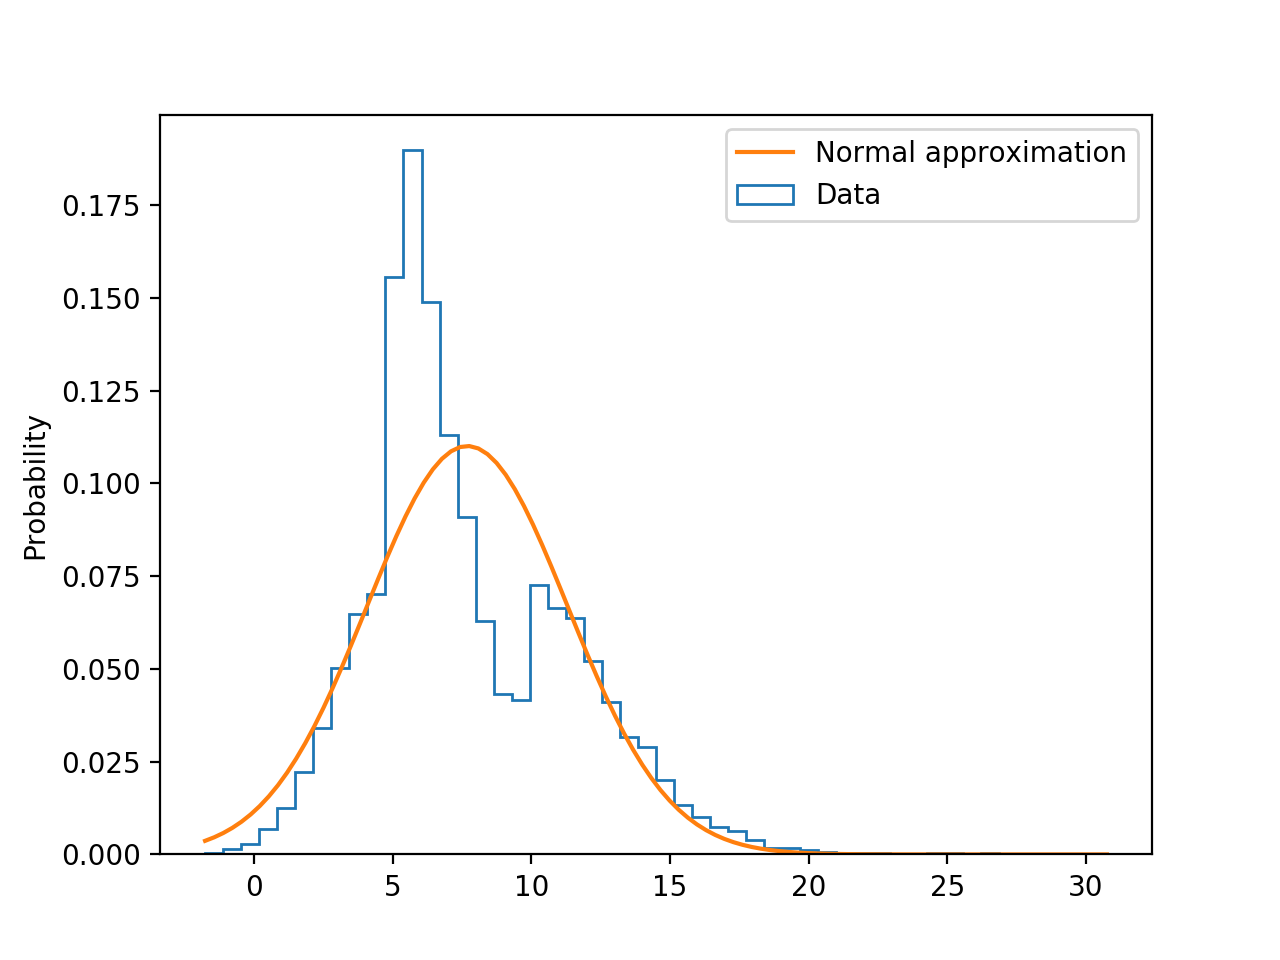

In [34]:
xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc = mean, scale = std)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys, label="Normal approximation")
plt.legend()
plt.ylabel("Probability");

### Skewness

In this section I might drop the word "moment" a few times. There are some standardised ways of quantifying "moments". The first moment is zero by definition. The second is variance. The third is skewness, which is often defined as $\gamma_1$.

$$ \gamma_1 = \frac{\kappa_3}{\kappa_2^{3/2}} = \frac{E[(x-\mu)^3]}{E[(x-\mu)^2]^{3/2}} $$

Measure of asymmetry in the data. Left/right skewed data.
In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined. 

In [37]:
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**3
    return (summed / (len(xs))) / (var ** 1.5) #(var ** 1.5) normalization factor
print(get_skewness([1,2,3,4,5]))

0.0


In [38]:
skewness = st.skew(data)
print(skewness,  get_skewness(data))

0.7408773663373577 0.7408773663373582


Let's update our normal approximation to a skewed normal approximation and see how it looks, just for fun.

<IPython.core.display.Javascript object>


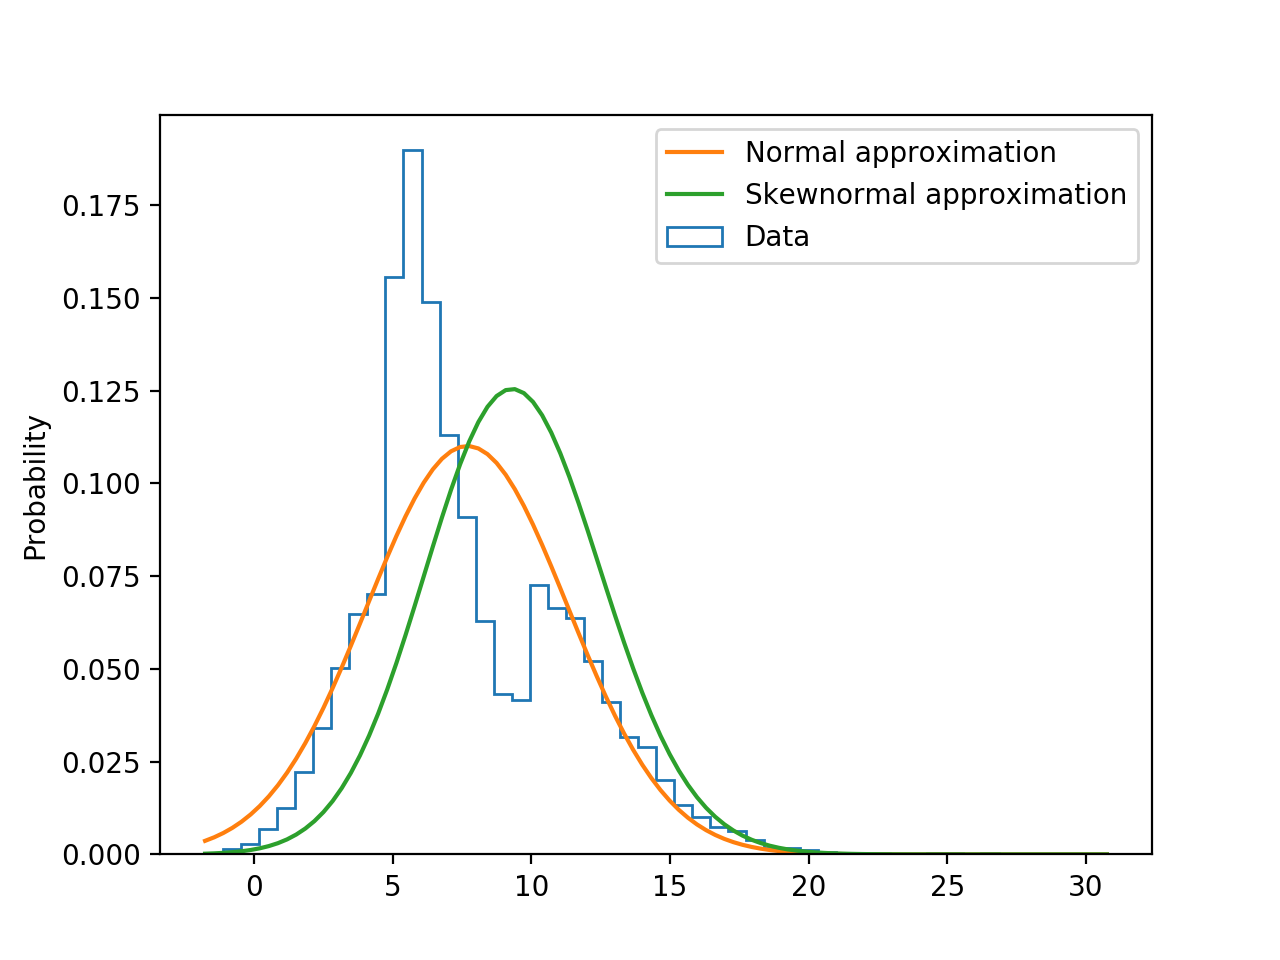

In [39]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ys2 = st.skewnorm.pdf(xs, skewness, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

Oh no, this doesn't look better? Where did we go wrong?

A skew normal cant just be given the mean and standard deviation of a normal and expected to work. The skewness modifies the mean and standard deviation. You need to actually fit.

<IPython.core.display.Javascript object>


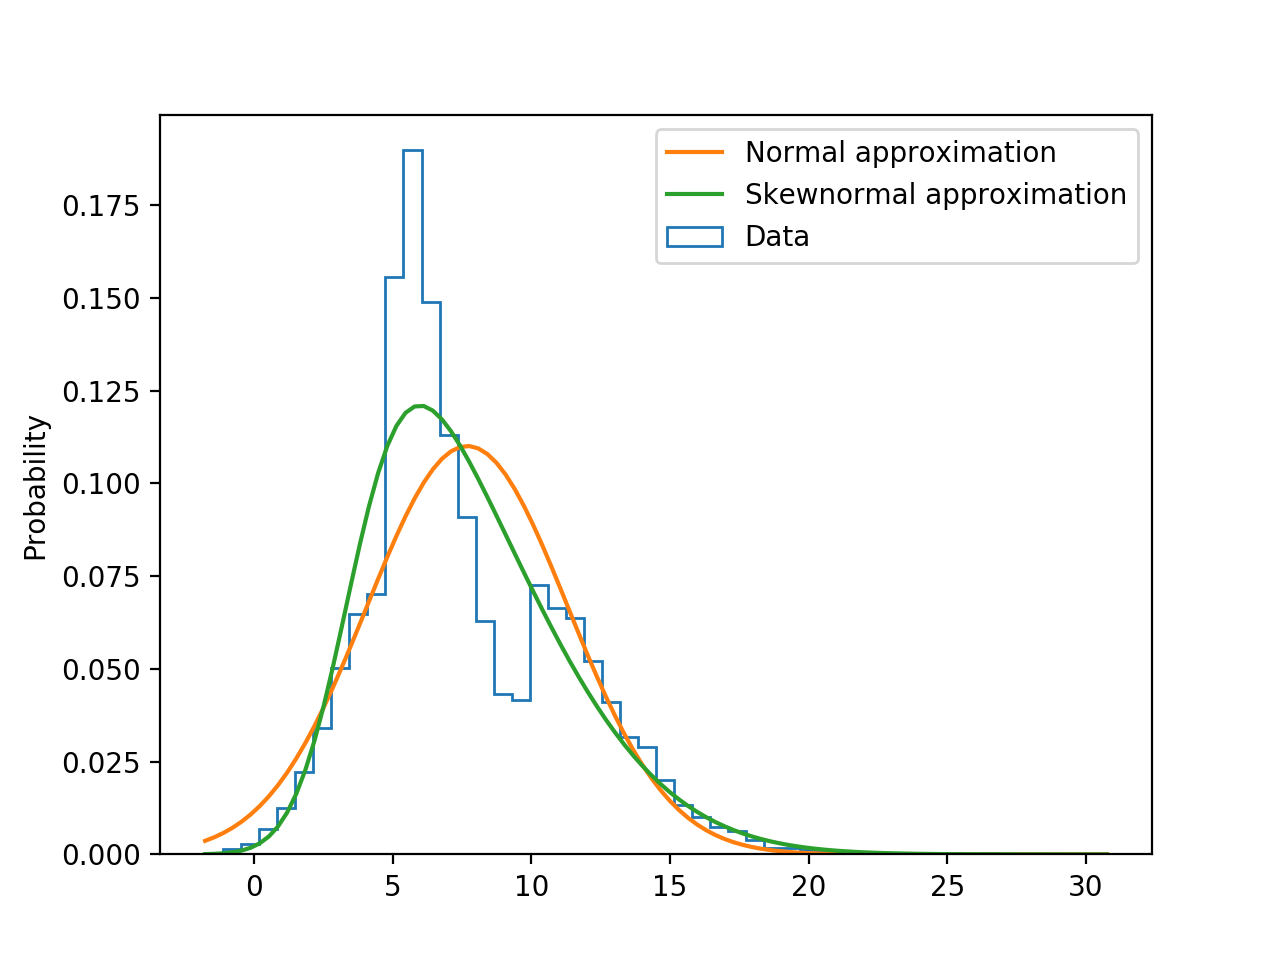

In [40]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ps = st.skewnorm.fit(data) # parameters
ys2 = st.skewnorm.pdf(xs, *ps)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

### Kurtosis

The next moment, and the last one we'll consider is kurtosis. It has a similar definition, and is often represented as $\kappa$ or $\gamma_2$:

$$ \kappa = \frac{E[(x-\mu)^4]}{E[(x-\mu)^2]^{4/2}} $$

In [41]:
def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**4
    return (summed / (len(xs))) / (var ** 2)
print(get_kurtosis([1,2,3,4,5]))

1.7


In [42]:
kurtosis = st.kurtosis(data, fisher=False)
print(kurtosis, get_kurtosis(data))

3.5517538497309498 3.551753849730955


`fisher` hey? So this is just a normalisation thing and because there are multiple definitions of kurtosis. With `fisher=False`, a normal distrubtion has a kurtosis of 3. With `fisher=True`, scipy subtracts 3 from the result so that a normal distribution would have a kurtosis of 0. Lots of things are compared to normal distributions, so having all the moments be 0 for them is handy. If you're curious about this, the difference is between "kurtosis" and "excess kurtosis", will help which will hopefully help when googling!

# When analytics fail

At the moment we've been coming up with ways to quantify our data distribution such that we could try and reconstruct something approximately the same using various analytic distributions, like the normal distribution. So what happens if that isn't going to be good enough?

### Percentiles

What if we - instead of using a mean or other such numbers - simply turned our long data vector down into a few points representing different percentiles? We could essentially reconstruct our data distribution to an aribtrary accuracy and never worry about analytic functions.




<IPython.core.display.Javascript object>


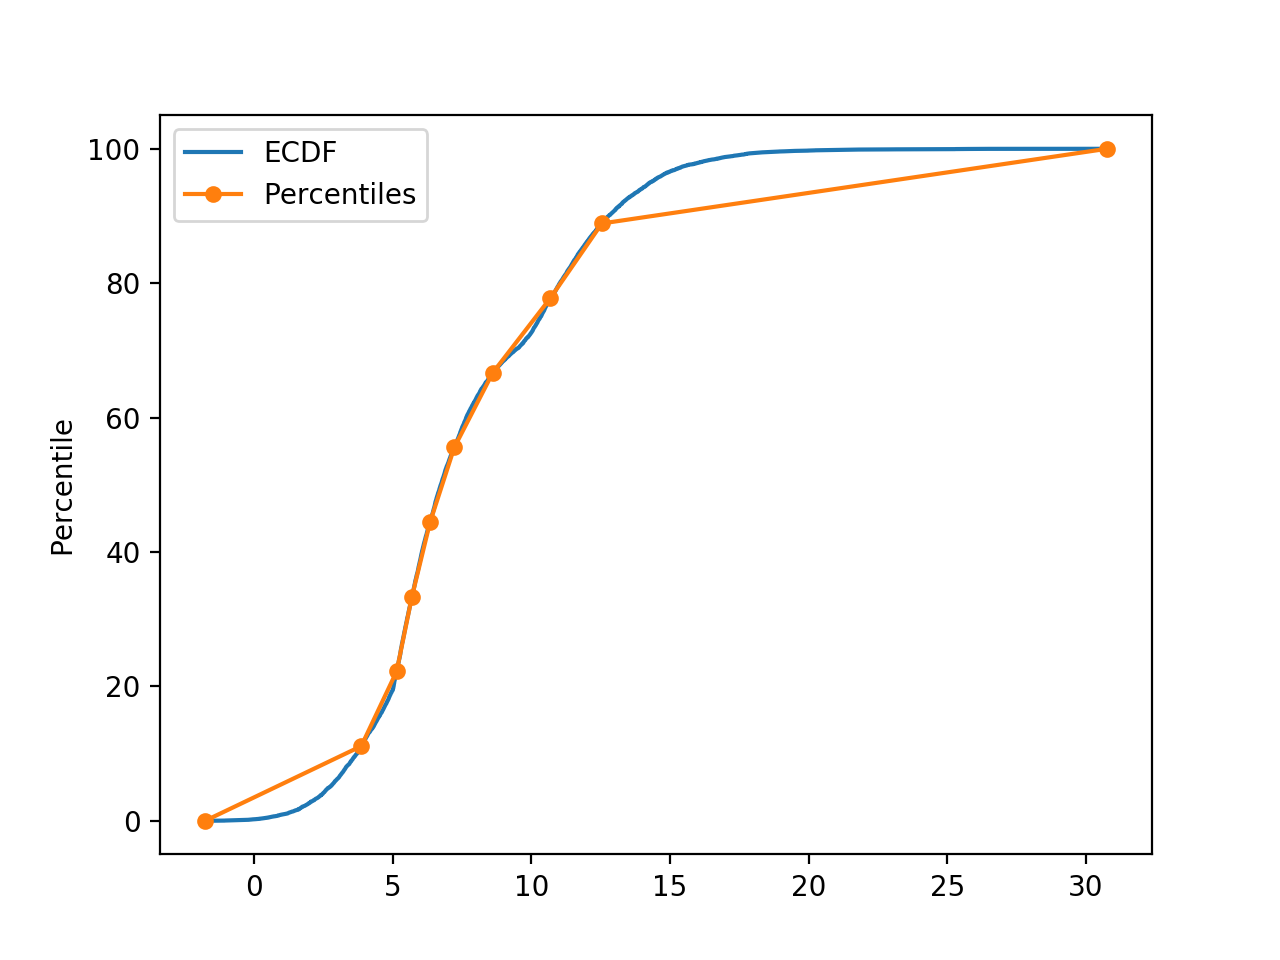

In [44]:
ps = np.linspace(0, 100, 10)
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

<IPython.core.display.Javascript object>


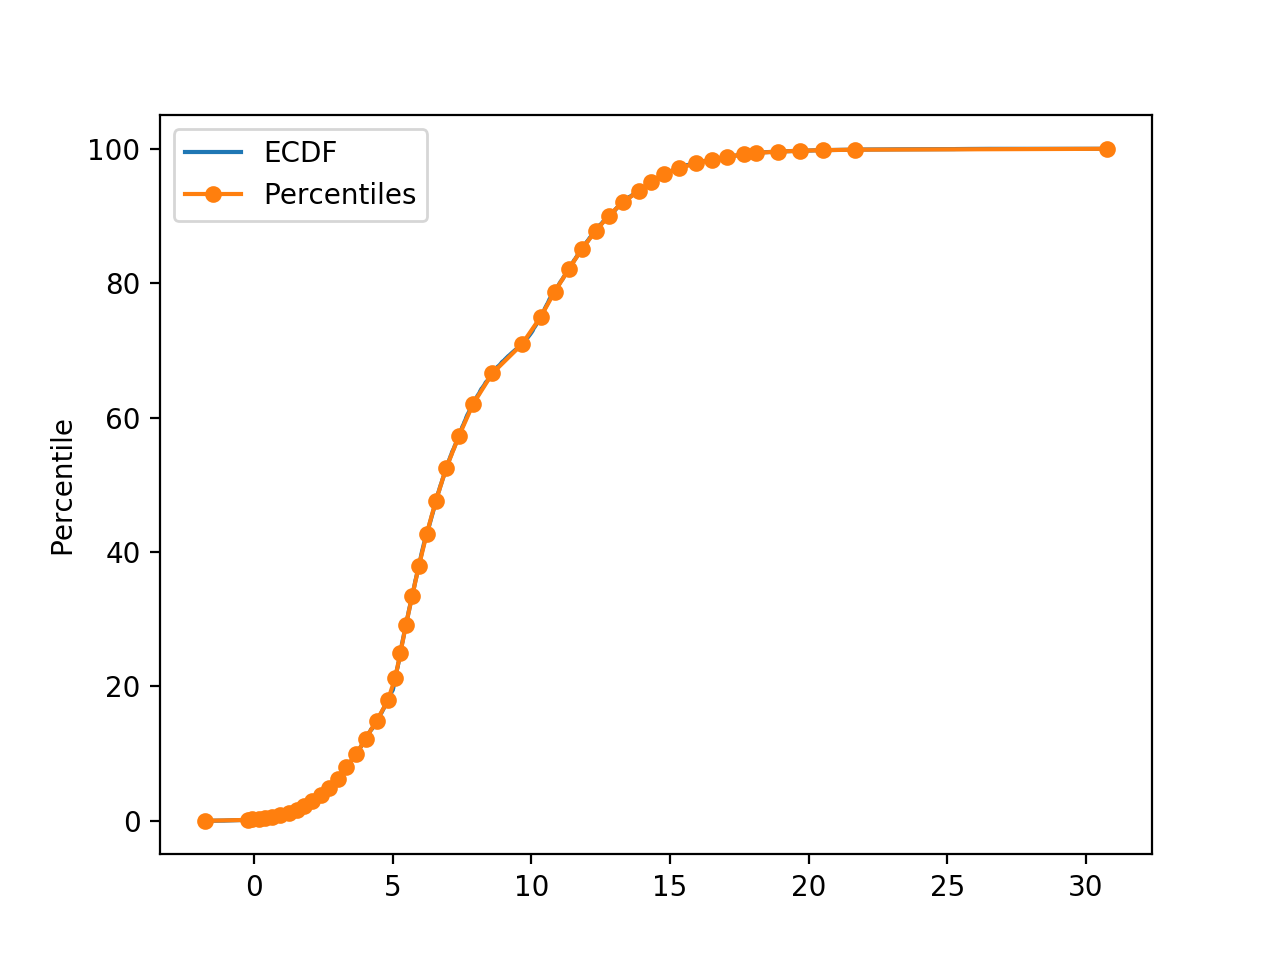

In [45]:
ps = 100 * st.norm.cdf(np.linspace(-3, 3, 50))
ps = np.concatenate(([0], ps, [100]))  # There is a bug in the insert way of doing it, this is better
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

<IPython.core.display.Javascript object>


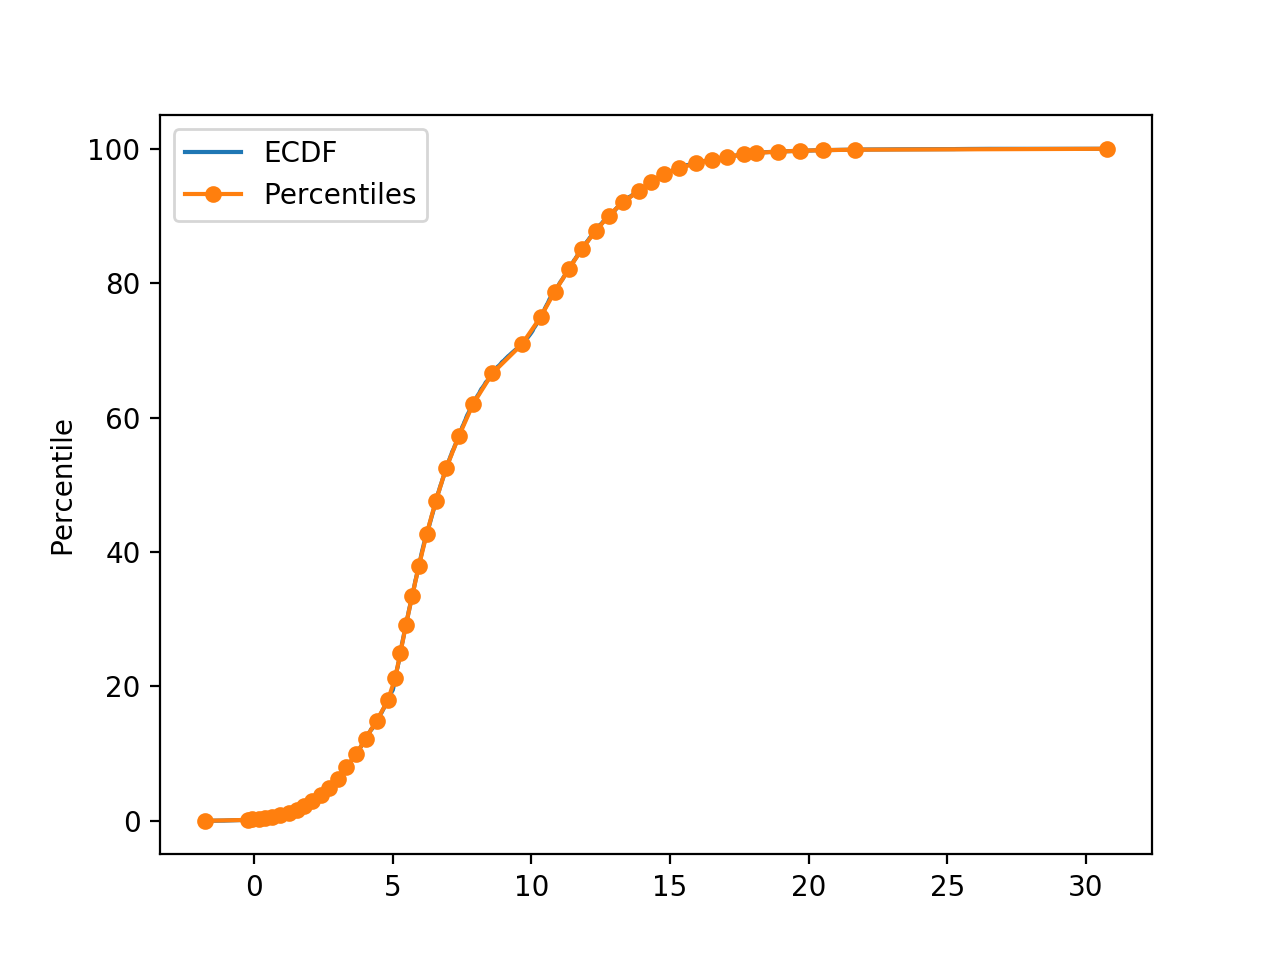

In [46]:
ps = 100 * st.norm.cdf(np.linspace(-3, 3, 50))
ps = np.concatenate(([0], ps, [100]))  # There is a bug in the insert way of doing it, this is better
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

<IPython.core.display.Javascript object>


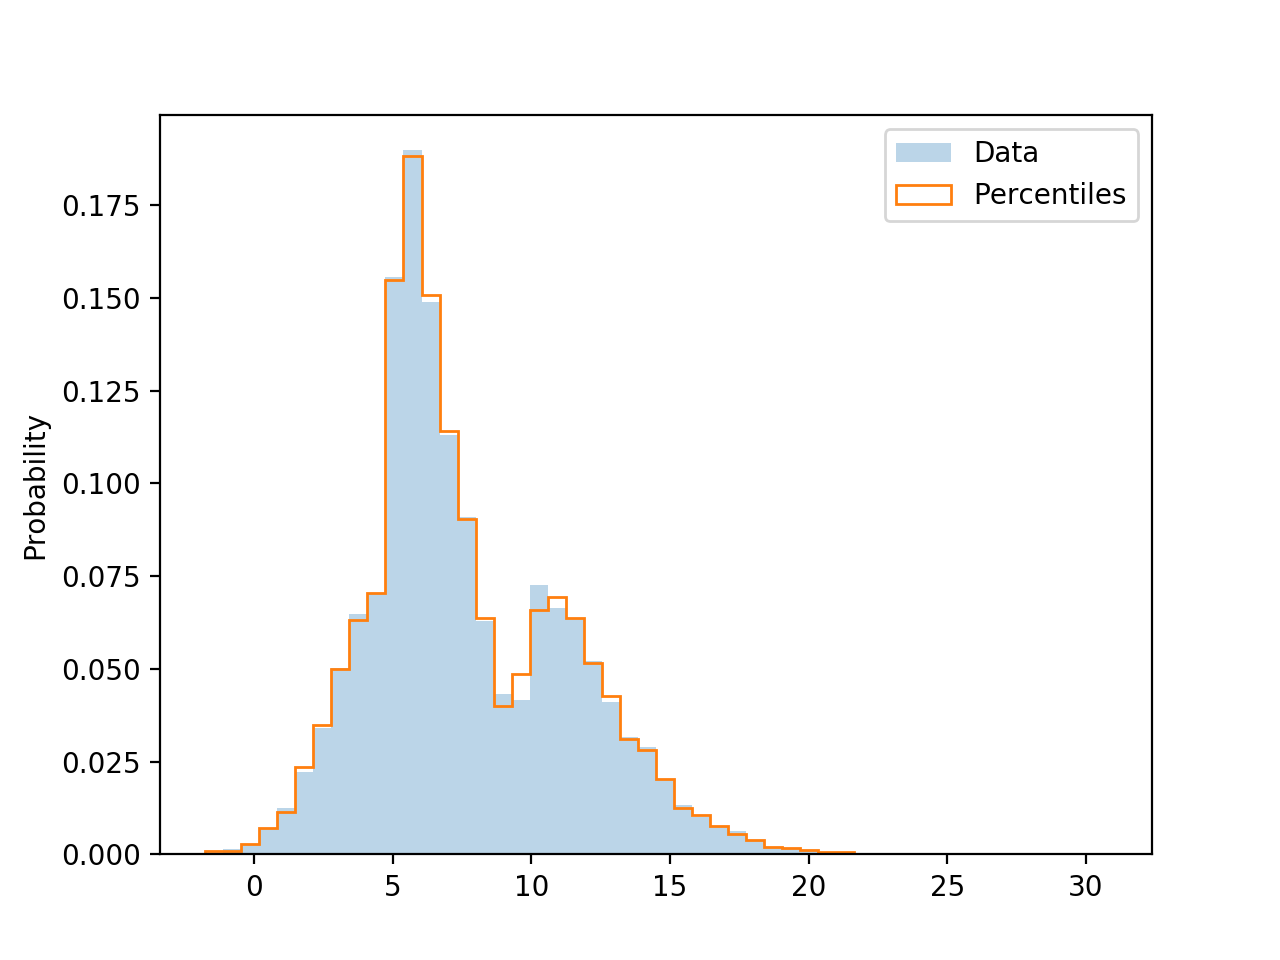

In [47]:
from scipy.interpolate import interp1d

n = int(1e6)
u = np.random.uniform(size=n)
samp_percentile_1 = interp1d(ps / 100, x_p)(u)

_, bins, _ = plt.hist(data, bins=50, density=True, alpha=0.3, label="Data")
plt.hist(samp_percentile_1, bins=bins, density=True, histtype="step", label="Percentiles")
plt.ylabel("Probability")
plt.legend();

Look at how nice those tails are now! And you can see that if we increased the number of samples in our second percentiles to around a hundred and we could very accurately describe our 1D distribution. And 100 data points are much faster to transfer than thousands of them.